Note that steps 1 and 2 of this strategy were executed in terminal. This notebook continues from steps 3-7.

# Setup

In [12]:
%reload_ext autoreload

# Imports
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Constants
BASELINE_PATH = join('data', 'baseline_coverage.txt')
MODIFIED_PATH = join('data', 'modified_coverage.txt')
COLUMNS = ['chromosome', 'position', 'depth']

# Preliminaries
First, I open the coverage files generated in step 2.

In [3]:
baseline_coverage = pd.read_csv(BASELINE_PATH, sep='\t', header=None, names=COLUMNS)
modified_coverage = pd.read_csv(MODIFIED_PATH, sep='\t', header=None, names=COLUMNS)

# Step 3: Normalize Coverage Distributions
The baseline and modified coverage distributions need to be normalized within sample so that they can be compared for further analysis. The normalization method chosen is a simple normalization by the mean of each respective distribution.

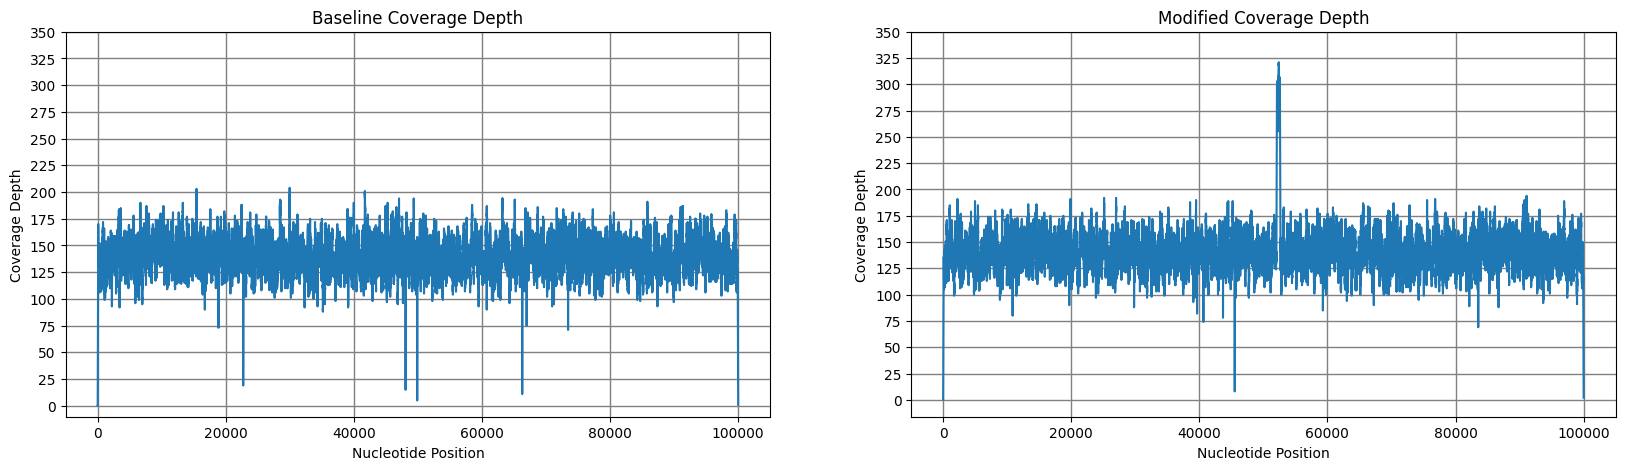

In [30]:
fig = plt.figure(figsize=(20, 5))

ax0 = fig.add_subplot(1,2,1)
plt.plot(baseline_coverage['depth'])
ax0.set_title("Baseline Coverage Depth")
ax0.set_yticks(np.arange(0, 370, 25))
ax0.grid(color='gray', linestyle='-', linewidth=1)
ax0.set_xlabel('Nucleotide Position')
ax0.set_ylabel('Coverage Depth')

ax1 = fig.add_subplot(1,2,2)
plt.plot(modified_coverage['depth'])
ax1.set_title("Modified Coverage Depth")
ax1.set_yticks(np.arange(0, 370, 25))
ax1.set_xlabel('Nucleotide Position')
ax1.set_ylabel('Coverage Depth')
ax1.grid(color='gray', linestyle='-', linewidth=1)

plt.show()

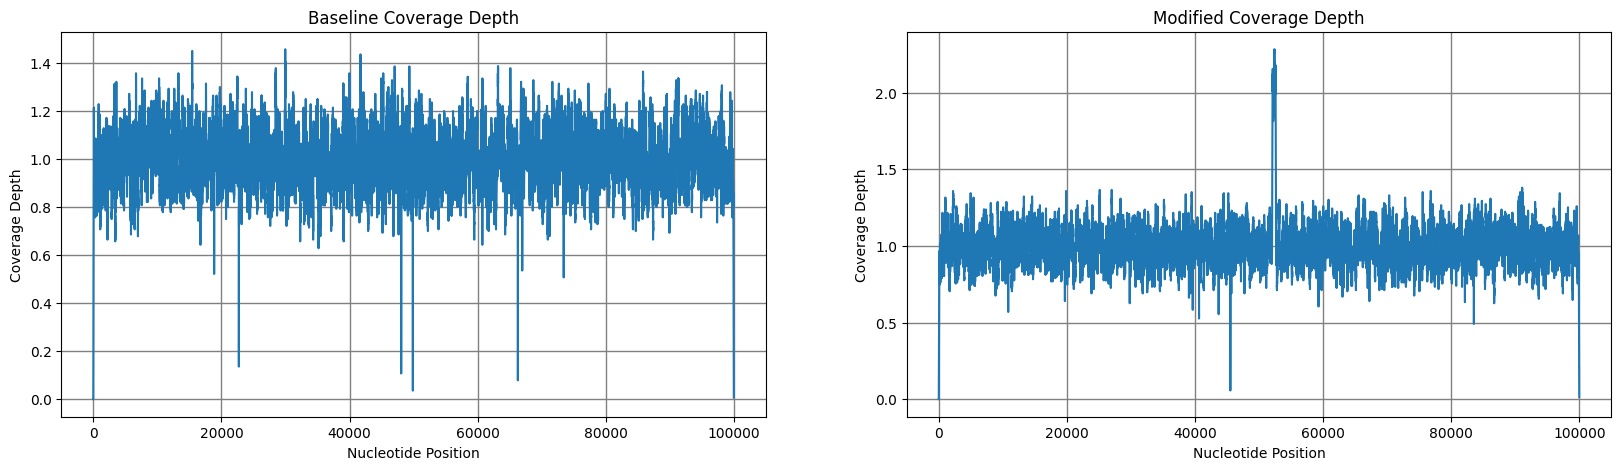

In [32]:
baseline_mean = baseline_coverage['depth'].mean()
modified_mean = modified_coverage['depth'].mean()

# Normalize by sample mean
baseline_coverage_norm = baseline_coverage['depth'] / baseline_mean
modified_coverage_norm = modified_coverage['depth'] / modified_mean

fig = plt.figure(figsize=(20, 5))

ax0 = fig.add_subplot(1,2,1)
plt.plot(baseline_coverage_norm)
ax0.set_title("Baseline Coverage Depth (Normalized)")
# ax0.set_yticks(np.arange(0, 370, 25))
ax0.grid(color='gray', linestyle='-', linewidth=1)
ax0.set_xlabel('Nucleotide Position')
ax0.set_ylabel('Coverage Depth')

ax1 = fig.add_subplot(1,2,2)
plt.plot(modified_coverage_norm)
ax1.set_title("Modified Coverage Depth (Normalized)")
# ax1.set_yticks(np.arange(0, 370, 25))
ax1.set_xlabel('Nucleotide Position')
ax1.set_ylabel('Coverage Depth')
ax1.grid(color='gray', linestyle='-', linewidth=1)

# Step 4: Determine Copy Number Gain
Now that the distributions are normalized we can determine the copy number gain for each distribution. This will

In [6]:


copy_no_gain_dist = (modified_coverage_norm - baseline_coverage_norm) / baseline_coverage_norm

# Coverage gain region of interest band parameters
copy_no_gain_dev = 0.5
copy_no_gain_value = 2.0

# Coverage gain boundaries
copy_no_gain_upper_bound = copy_no_gain_dist <= copy_no_gain_value + copy_no_gain_dev
copy_no_gain_lower_bound = copy_no_gain_dist >= copy_no_gain_value - copy_no_gain_dev

# Coverage gain region of interest
roi_copy_no_gain = copy_no_gain_dist[copy_no_gain_lower_bound & copy_no_gain_upper_bound]

# Extract the largest contiguous sub-region with some tolerance
# print(roi_copy_no_gain)
contiguous_regions = []

print(roi_copy_no_gain)

52202    1.513301
52203    1.546082
52204    1.583251
52205    1.508487
52206    1.531713
52207    1.517608
52208    1.571725
52209    1.504803
52210    1.504803
52224    1.589047
52225    1.559514
52226    1.529121
52229    1.571725
52230    1.575640
52231    1.567734
52232    1.544169
52233    1.504803
52234    1.533484
52235    1.567734
52236    1.548428
52237    1.681524
52238    1.654709
52239    1.614938
52240    1.569359
52241    1.604995
52242    1.658158
52243    1.585110
52244    1.681524
52245    1.544169
52246    1.544169
52327    1.546734
52328    1.520569
52331    1.516478
52332    1.547824
99996    1.651394
Name: depth, dtype: float64


Inspecting the output shows that there are two regions of interest:
1. [52202, 52332]
2. [99996]

Clearly, region 2 is an outlier, since it consists of a single nucleotide, and can be omitted. Therefore the gene with 2x copy gain is the gene associated with region 1. A visual inspection of the annotations file shows that region 1 lies within the boundaries of gene_14:
`toy_genome	52100	52600	gene_14	0	+`